Time Series Homework

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf

%matplotlib inline

In [ ]:
!cat Readme.txt

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [ ]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Preprocessing

In [ ]:
# Rename columns
df = df.rename(columns = {'instant': 'rec_id',
                      'dteday': 'datetime',
                      'holiday': 'is_holiday',
                      'workingday': 'is_workingday',
                      'weathersit': 'weather_condition',
                      'hum': 'humidity',
                      'mnth': 'month',
                      'cnt': 'total_count',
                      'hr': 'hour',
                      'yr': 'year'})

In [ ]:
df['datetime'] = pd.to_datetime(df.datetime)

In [ ]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [ ]:
df.isna().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

# EDA

Text(0.5, 1.0, 'Bikes rented per Hour by Season distribution')

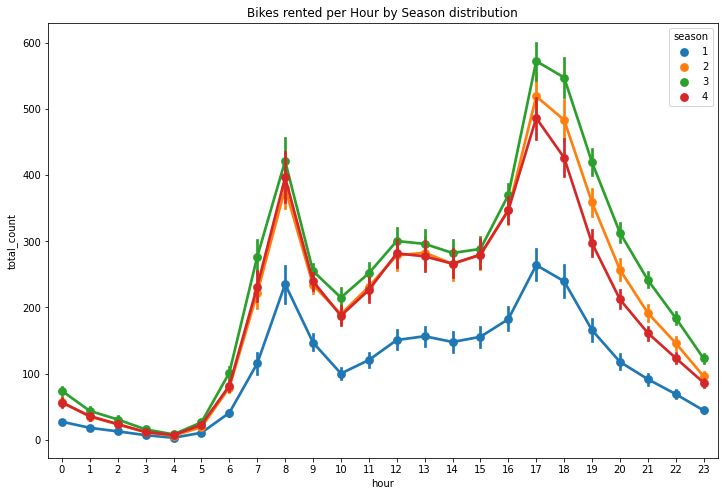

In [ ]:
plt.figure(figsize = (12, 8))
sns.pointplot(data = df[['hour', 'total_count', 'season']],
              x = 'hour', y = 'total_count', hue = 'season')
plt.title('Bikes rented per Hour by Season distribution')

The most bikes rented overall in season number `3`, which is `autumn`.

The lowest number of bikes rented is season number `1`, which is `spring`.

Text(0.5, 1.0, 'Bikes rented per Hour by Weekday distribution')

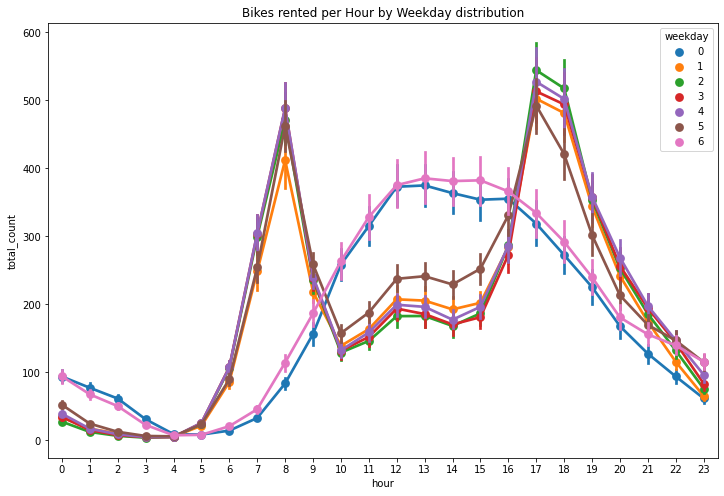

In [ ]:
plt.figure(figsize = (12, 8))
sns.pointplot(data = df[['hour', 'total_count', 'weekday']],
              x = 'hour', y = 'total_count', hue = 'weekday')
plt.title('Bikes rented per Hour by Weekday distribution')

Generally we can say that at night (around 9PM to 6AM) there are not so much bikes rented (obviously).

In weekend days (`0`: `Sunday`, `6:`,`Saturday`) the biks usually rented with the biggest number around from 10AM to 6PM.

On the other weekdays the most popular hours are in the morning and evening, usually between 6AM - 9AM, and 4PM - 8PM. In my opininon the reason for this is because the people are like to go to work with cycle since it's eco-friendly, cheap and healthy way to travel.

Text(0.5, 1.0, 'Bikes rented by Month')

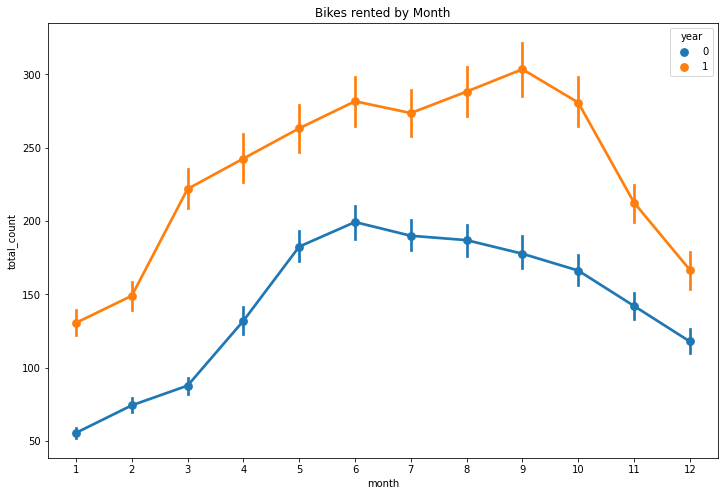

In [ ]:
plt.figure(figsize = (12, 8))
sns.pointplot(data = df[['month', 'total_count', 'year']],
            x = 'month', y = 'total_count', hue = 'year')
plt.title('Bikes rented by Month')

In the first year (2011) from March there is a growth in rentings, and from July there is recession.

However, in the second year (2012) from February there is a big growth until September, then a big drop after that.

Overall, in Summer the most bike rented.

Text(0.5, 1.0, 'Bikes rented by Season')

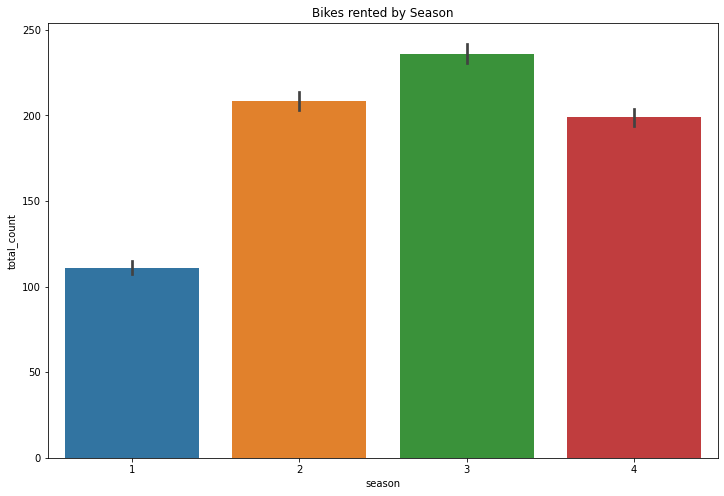

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df[['season', 'total_count']],
              x = 'season', y = 'total_count')
plt.title('Bikes rented by Season')

Again, we can see that in Spring there is the most less bikes rented, and in autumnt there is the most.

Text(0.5, 1.0, 'Bikes rented by Season')

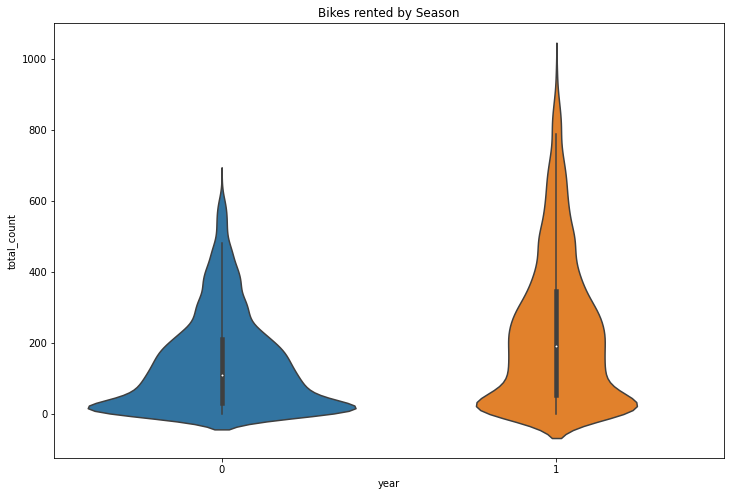

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(data = df[['year', 'total_count']],
              x = 'year', y = 'total_count')
plt.title('Bikes rented by Season')

Check for outliers.

<AxesSubplot:>

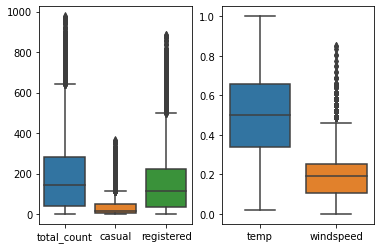

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.boxplot(data = df[['total_count', 'casual', 'registered']], ax = ax1)
sns.boxplot(data = df[['temp', 'windspeed']], ax = ax2)

Text(0.5, 1.0, 'Outliers in Hours')

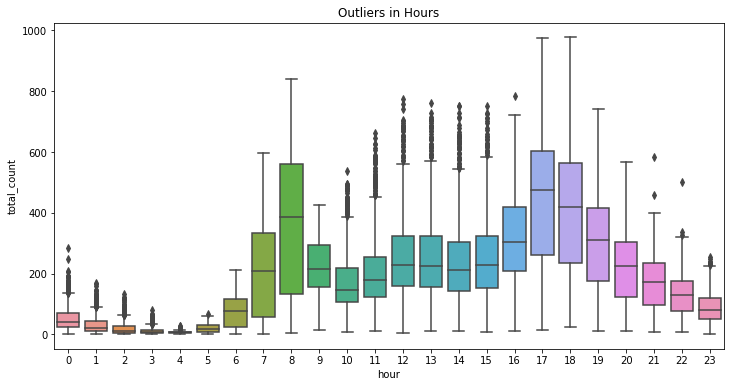

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df[['total_count', 'hour']],
            x = 'hour', y = 'total_count')
plt.title('Outliers in Hours')

In [ ]:
df_index = df.set_index('datetime')

## Test for stationarity


In [ ]:
y = df['total_count']

alpha = 0.05
print(f"alpha = {alpha}\n")

# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(y, autolag='AIC')
print(f'ADF Statistic: {result[0]:.4g}')
print(f'p-value: {result[1]:.4g}')
if result[1] < alpha:
    print("The process is stationary.")
else:
    print("The process is non-stationary.")  

alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -6.823
p-value: 1.981e-09
The process is stationary.


The process is stationary, so it means that the mean, variance and covariance of the series are constant over time.

In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(y, regression='c')
print(f"KPSS Statistic = {kpsstest[0]:.4g}")
print(f"p-value = {kpsstest[1]:.4g}")
if kpsstest[1] < alpha:
    print("The process is non-stationary.")
else:
    print("The process is stationary.")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 19.94
p-value = 0.01
The process is non-stationary.


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


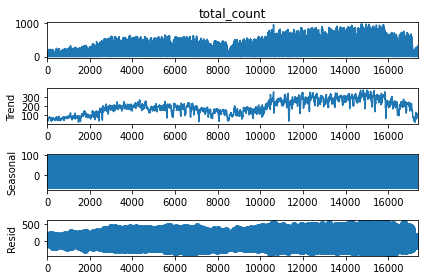

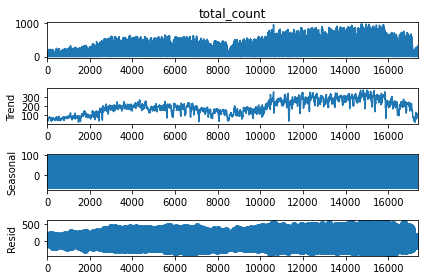

In [ ]:
decomposition = seasonal_decompose(df['total_count'], model='additive', period=24)
decomposition.plot()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


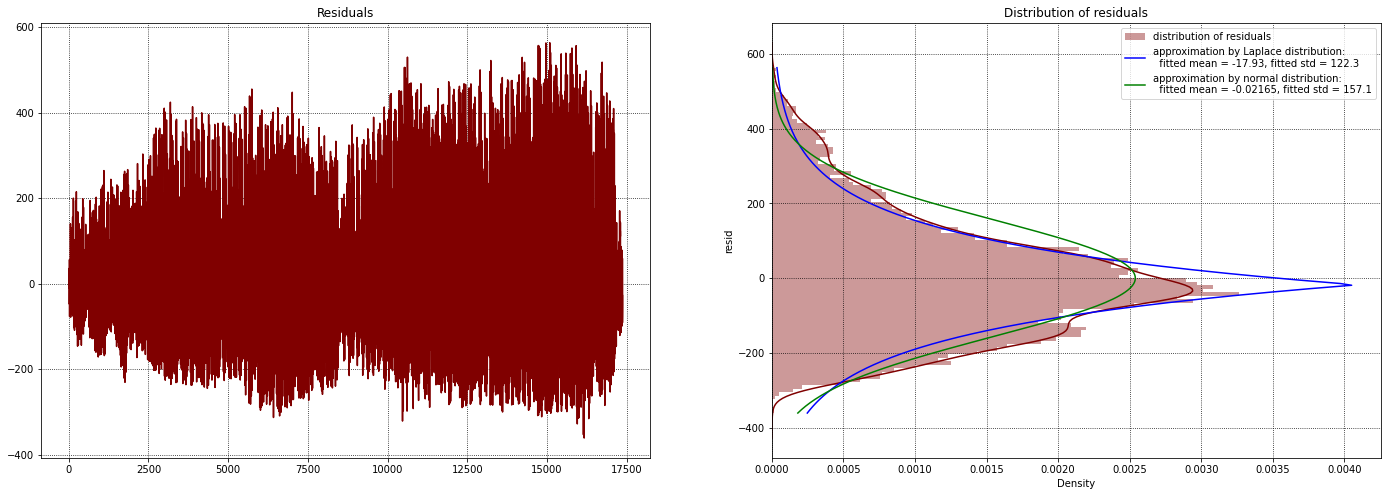

In [ ]:
resid = decomposition.resid
color = 'maroon'

plt.subplots(1, 2, figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(resid, '-', color=color)
plt.grid(linestyle=':', color='k')
plt.title("Residuals")



x_fit = np.linspace(resid.min(), resid.max(), 201)
loc_laplace, scale_laplace = st.laplace.fit(resid.dropna())
loc_norm, scale_norm = st.norm.fit(resid.dropna())
# print(f"Fitting of residuals by Laplace distribution: fitted mean = {loc:.3f}, fitted std = {scale:.3f}")
y_fit_laplace = st.laplace.pdf(x_fit, loc_laplace, scale_laplace)
y_fit_norm = st.norm.pdf(x_fit, loc_norm, scale_norm)

plt.subplot(1, 2, 2)
sns.distplot(resid, color=color, bins=100, vertical=True, label="distribution of residuals")
plt.plot(y_fit_laplace, x_fit, '-b', 
         label=f"approximation by Laplace distribution:\n  fitted mean = {loc_laplace:.4g}, fitted std = {scale_laplace:.4g}")
plt.plot(y_fit_norm, x_fit, '-g', 
         label=f"approximation by normal distribution:\n  fitted mean = {loc_norm:.4g}, fitted std = {scale_norm:.4g}")
plt.legend()
# plt.ylim(resid-0.02*y_range, y_max+0.02*y_range)
plt.title("Distribution of residuals")
plt.grid(linestyle=':', color='k')

plt.show()

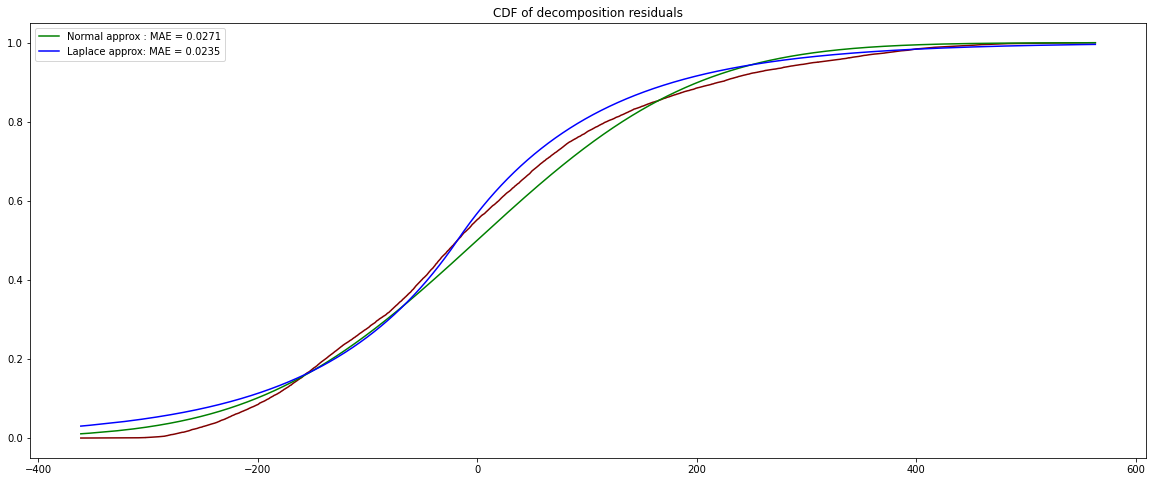

MAE_Gaussian/MAE_Laplace = 1.15.


In [ ]:
ecdf_resid_instance = ECDF(resid.dropna())
resid_arr = resid.dropna().sort_values().values
ecdf_resid = ecdf_resid_instance(resid_arr)


cdf_norm = st.norm.cdf(resid_arr, loc=loc_norm, scale=scale_norm)
cdf_laplace = st.laplace.cdf(resid_arr, loc=loc_laplace, scale=scale_laplace)


mae_norm = mean_absolute_error(ecdf_resid, cdf_norm)
mae_laplace = mean_absolute_error(ecdf_resid, cdf_laplace)


plt.subplots(1, 1, figsize=(20, 8))
plt.plot(resid_arr, ecdf_resid, '-', color='maroon')
plt.plot(resid_arr, cdf_norm, '-g', 
         label=f"Normal approx : MAE = {mae_norm:.3g}")
plt.plot(resid_arr, cdf_laplace, '-b', 
         label=f"Laplace approx: MAE = {mae_laplace:.3g}")
plt.legend()
plt.title("CDF of decomposition residuals")
plt.show()

print(f"MAE_Gaussian/MAE_Laplace = {mae_norm/mae_laplace:.3g}.")

It looks okay for a normal distribution.

Autocorrelation of residuals

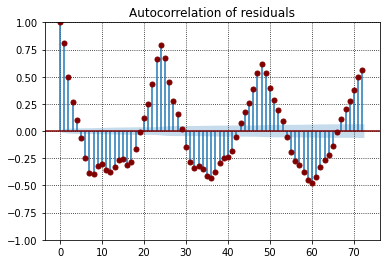

In [ ]:
lags = 72
plot_acf(resid.dropna(), lags=lags, color='maroon', 
         title='Autocorrelation of residuals');
plt.grid(linestyle=':', color='k')
plt.show()

These residuals has a 24-hours periodic component I guess.

Test for trend stationarity

In [ ]:
trend = decomposition.trend.dropna()

alpha = 0.05


print(f"alpha = {alpha}\n")
# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(trend.dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]:.4g}')
print(f'p-value: {result[1]:.4g}')
if result[1] < alpha:
    print("The process is stationary.\n")
else:
    print("The process is non-stationary.\n") 

alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -5.324
p-value: 4.89e-06
The process is stationary.



In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(trend.dropna(), regression='c')
print(f"KPSS Statistic = {kpsstest[0]:.4g}")
print(f"p-value = {kpsstest[1]:.4g}")
if kpsstest[1] < alpha:
    print("The process is non-stationary.\n")
else:
    print("The process is stationary.\n")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 11.23
p-value = 0.01
The process is non-stationary.



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Text(0.5, 1.0, '1st derivative of trend')

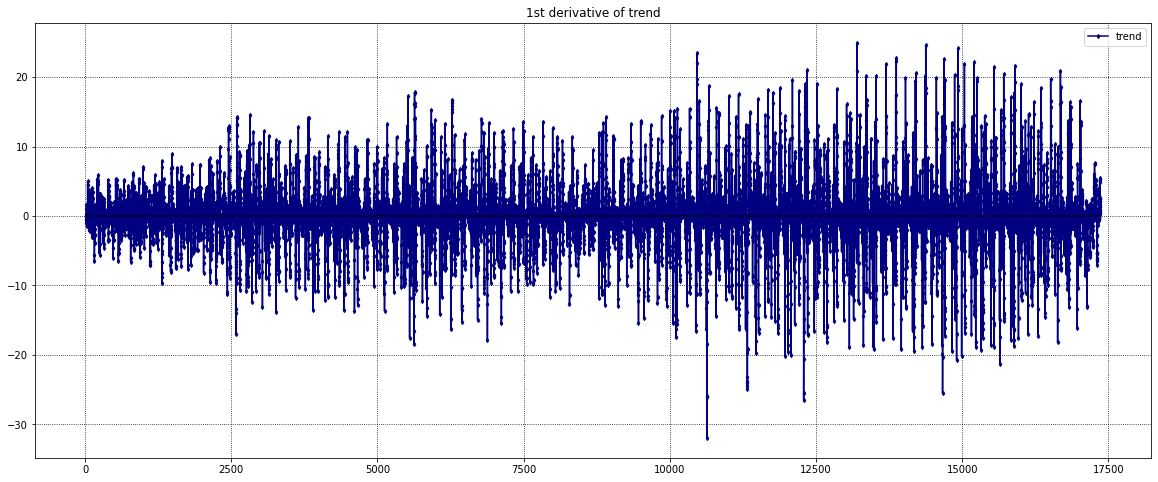

In [ ]:
trend_diff = trend.diff().dropna()

plt.subplots(1, 1, figsize=(20, 8))

plt.plot(trend_diff, '-d', color='navy', markersize=3, label='trend')
plt.plot([trend_diff.index[0], trend_diff.index[-1]], [0, 0], '--k')
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title("1st derivative of trend")

In [ ]:
alpha = 0.05


print(f"alpha = {alpha}\n")
# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(trend_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]:.4g}')
print(f'p-value: {result[1]:.4g}')
if result[1] < alpha:
    print("The process is stationary.")
else:
    print("The process is non-stationary.") 

alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -24.4
p-value: 0
The process is stationary.


In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(trend_diff, regression='c')
print(f"KPSS Statistic = {kpsstest[0]:.4g}")
print(f"p-value = {kpsstest[1]:.4g}")
if kpsstest[1] < alpha:
    print("The process is non-stationary.")
else:
    print("The process is stationary.")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 0.01405
p-value = 0.1
The process is stationary.


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Now both test gives us the result that the process is stationary.

## Correlation Analysis

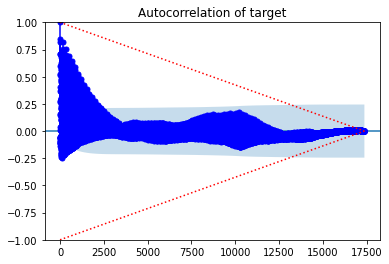

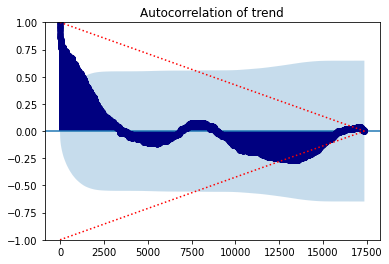

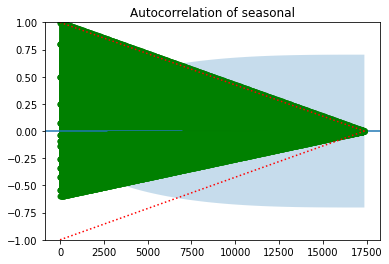

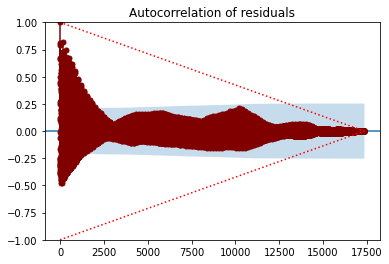

In [ ]:
N = len(y)
k = np.arange(0, N)
plot_acf(y, 
         lags=N-1, 
         vlines_kwargs={'color' : 'b'},
         markerfacecolor='b', markeredgecolor='b', 
         title='Autocorrelation of target');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')

trend = decomposition.trend.dropna()
N = len(trend)
k = np.arange(0, N)
plot_acf(trend, 
         lags=N-1, 
         vlines_kwargs={'color' : 'navy'}, 
         markerfacecolor='navy', markeredgecolor='navy', 
         title='Autocorrelation of trend');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


seasonal = decomposition.seasonal
N = len(seasonal)
k = np.arange(0, N)
plot_acf(seasonal, 
         lags=N-1, 
         vlines_kwargs={'color' : 'g'}, 
         markerfacecolor='g', markeredgecolor='g', 
         title='Autocorrelation of seasonal');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(resid.dropna())
k = np.arange(0, N)
plot_acf(resid.dropna(), 
         lags=N-1,   
         vlines_kwargs={'color' : 'maroon'}, 
         markerfacecolor='maroon', markeredgecolor='maroon', 
         title='Autocorrelation of residuals');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


plt.show()

Text(0.5, 1.0, 'Correlations')

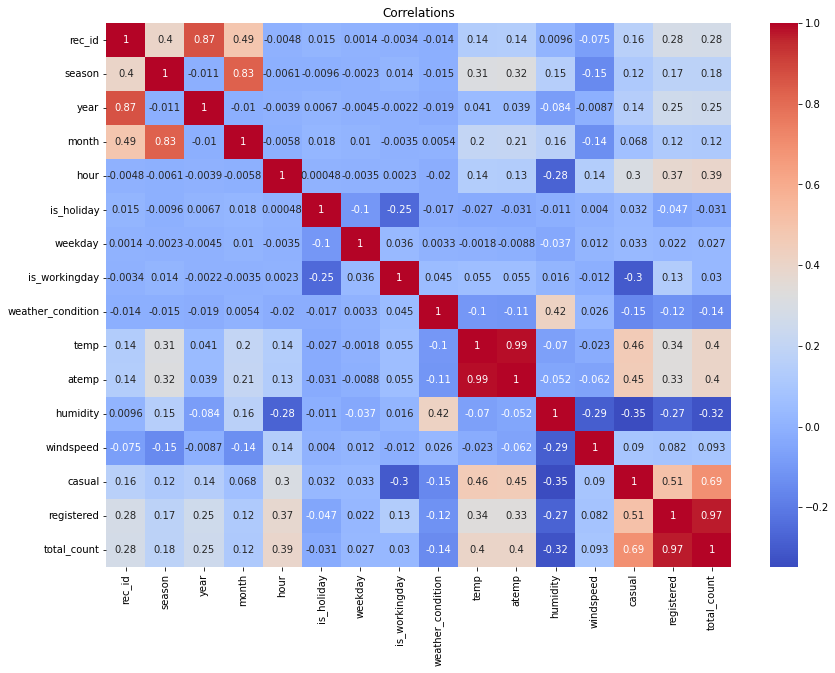

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True)
plt.title('Correlations')

## Test Split

In [ ]:
last_month = df[df['datetime'] > df['datetime'].max() - pd.DateOffset(months=1)]

In [ ]:
last_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 16637 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             742 non-null    int64         
 1   datetime           742 non-null    datetime64[ns]
 2   season             742 non-null    int64         
 3   year               742 non-null    int64         
 4   month              742 non-null    int64         
 5   hour               742 non-null    int64         
 6   is_holiday         742 non-null    int64         
 7   weekday            742 non-null    int64         
 8   is_workingday      742 non-null    int64         
 9   weather_condition  742 non-null    int64         
 10  temp               742 non-null    float64       
 11  atemp              742 non-null    float64       
 12  humidity           742 non-null    float64       
 13  windspeed          742 non-null    float64       
 14  casu

In [ ]:
print(last_month['datetime'].head())
print(last_month['datetime'].tail())

16637   2012-12-01
16638   2012-12-01
16639   2012-12-01
16640   2012-12-01
16641   2012-12-01
Name: datetime, dtype: datetime64[ns]
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: datetime, dtype: datetime64[ns]


In [ ]:
test_df = last_month

In [ ]:
train_df = df[df['datetime'] <= df['datetime'].max() - pd.DateOffset(months=1)]

In [ ]:
print(train_df['datetime'].head())
print(train_df['datetime'].tail())

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: datetime, dtype: datetime64[ns]
16632   2012-11-30
16633   2012-11-30
16634   2012-11-30
16635   2012-11-30
16636   2012-11-30
Name: datetime, dtype: datetime64[ns]


## Endogenous features

According to the description:

**Endogenous features**: All variables engineered from target and time

In [ ]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [ ]:
endogen_features = ['season', 'year', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'casual', 'registered', 'total_count']

In [ ]:
train_df = train_df[endogen_features]
test_df = test_df[endogen_features]

In [ ]:
X_train = train_df.drop(columns = ['total_count'])
y_train = train_df['total_count']

X_test = test_df.drop(columns = ['total_count'])
y_test = test_df['total_count']

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16637, 9) (16637,)
(742, 9) (742,)


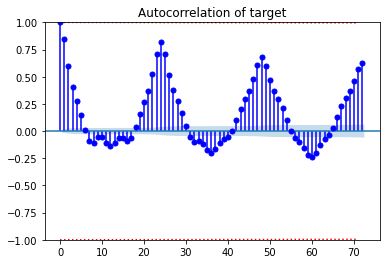

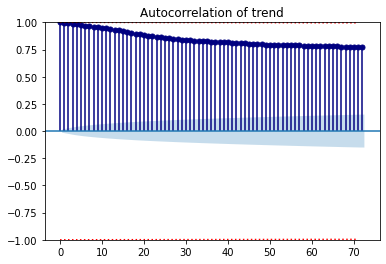

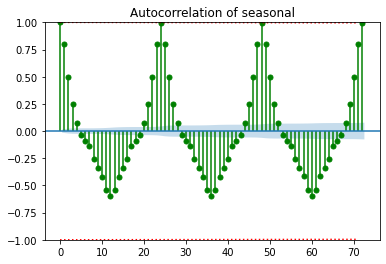

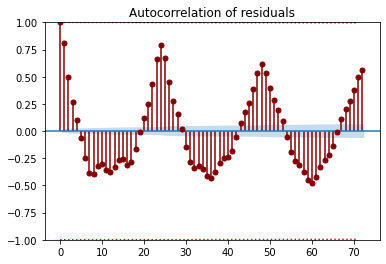

In [ ]:
lags = 72

N = len(y)
k = np.arange(0, lags)
plot_acf(y, 
         lags=lags, 
         vlines_kwargs={'color' : 'b'},
         markerfacecolor='b', markeredgecolor='b', 
         title='Autocorrelation of target');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(trend)
plot_acf(trend, 
         lags=lags, 
         vlines_kwargs={'color' : 'navy'}, 
         markerfacecolor='navy', markeredgecolor='navy', 
         title='Autocorrelation of trend');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


seasonal = decomposition.seasonal
N = len(seasonal)
plot_acf(seasonal, 
         lags=lags, 
         vlines_kwargs={'color' : 'g'}, 
         markerfacecolor='g', markeredgecolor='g', 
         title='Autocorrelation of seasonal');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(resid.dropna())
plot_acf(resid.dropna(), 
         lags=lags,   
         vlines_kwargs={'color' : 'maroon'}, 
         markerfacecolor='maroon', markeredgecolor='maroon', 
         title='Autocorrelation of residuals');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


plt.show()

In [ ]:
test_ind = y_test.index
test_ind

Int64Index([16637, 16638, 16639, 16640, 16641, 16642, 16643, 16644, 16645,
            16646,
            ...
            17369, 17370, 17371, 17372, 17373, 17374, 17375, 17376, 17377,
            17378],
           dtype='int64', length=742)

In [ ]:
X_train

,season,year,month,hour,is_holiday,weekday,is_workingday,casual,registered
0,1,0,1,0,0,6,0,3,13
1,1,0,1,1,0,6,0,8,32
2,1,0,1,2,0,6,0,5,27
3,1,0,1,3,0,6,0,3,10
4,1,0,1,4,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...
16632,4,1,11,19,0,5,1,18,359
16633,4,1,11,20,0,5,1,12,233
16634,4,1,11,21,0,5,1,14,169
16635,4,1,11,22,0,5,1,18,145


# Logistic Regression

Scale with minmax scaler

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
# Train with endogenous data (- casual and registered)
X_train_times = X_train.drop(columns = ['casual', 'registered'])
X_test_times = X_test.drop(columns = ['casual', 'registered'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_times)
scaler.fit(X_test_times)

X_train_times = scaler.transform(X_train_times)
X_test_times = scaler.transform(X_test_times)

In [ ]:
reg.fit(X_train_times, y_train)
reg.score(X_test_times, y_test)

-0.10787180867889457

In [ ]:
p, d, q = 24, 1, 24

arima_model = ARIMA(y_train, order=(p, d, q)).fit()
print()
print(f"ARIMA model ({p}, {d}, {q}):")
print(arima_model.params)

prediction_arima_train = arima_model.predict(X_train.index[0], X_train.index[-1])
prediction_arima_test = arima_model.predict(test_ind[0], test_ind[-1])

mae_arima = mean_absolute_error(y_true=y_test, y_pred=prediction_arima_test)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA model (24, 1, 24):
ar.L1       -0.083164
ar.L2       -0.138467
ar.L3       -0.122277
ar.L4       -0.091303
ar.L5       -0.120525
ar.L6       -0.105708
ar.L7       -0.072522
ar.L8       -0.133209
ar.L9       -0.084166
ar.L10      -0.161186
ar.L11      -0.143753
ar.L12      -0.136874
ar.L13      -0.168423
ar.L14      -0.138888
ar.L15      -0.102464
ar.L16      -0.133334
ar.L17      -0.082688
ar.L18      -0.134789
ar.L19      -0.086324
ar.L20      -0.073021
ar.L21      -0.124935
ar.L22      -0.092623
ar.L23      -0.086050
ar.L24       0.649266
ma.L1        0.108263
ma.L2       -0.244582
ma.L3       -0.213386
ma.L4       -0.139027
ma.L5       -0.090957
ma.L6       -0.108528
ma.L7       -0.156310
ma.L8       -0.168449
ma.L9        0.174562
ma.L10       0.291695
ma.L11       0.096099
ma.L12      -0.005811
ma.L13      -0.000645
ma.L14       0.045597
ma.L15       0.001566
ma.L16      -0.146248
ma.L17      -0.130747
ma.L18      -0.022866
ma.L19      -0.046483
ma.L20      -0.047066
ma.L21

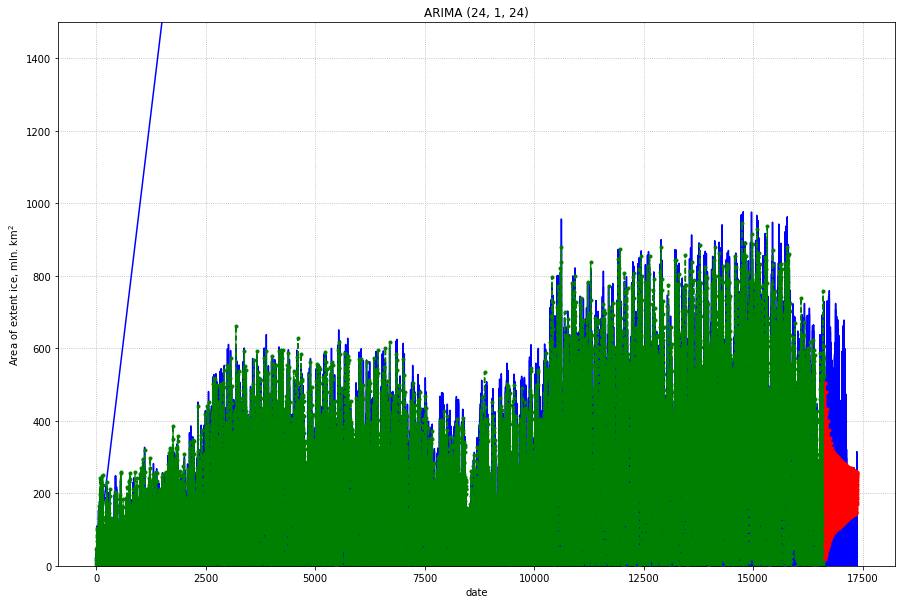

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(df.index, df, '-b')
plt.plot(arima_model.fittedvalues, '--og', markersize=3, 
         label="train fitted values")
plt.plot(y_test.index, prediction_arima_test, '-or', markersize=3, 
         label=f"prediction, MAE = {mae_arima:0.3f}")
plt.grid(linestyle=':')
plt.xlabel("date")
plt.ylabel("Area of extent ice, mln. km$^2$")
plt.title(f"ARIMA {(p, d, q)}")
plt.ylim([0, 1500])
plt.show(True)

In [ ]:
p, d, q = 6, 1,10

arima_model = ARIMA(y_train, order=(p, d, q)).fit()
print()
print(f"ARIMA model ({p}, {d}, {q}):")
print(arima_model.params)

prediction_arima_train = arima_model.predict(X_train.index[0], X_train.index[-1])
prediction_arima_test = arima_model.predict(test_ind[0], test_ind[-1])

mae_arima = mean_absolute_error(y_true=y_test, y_pred=prediction_arima_test)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA model (6, 1, 10):
ar.L1        0.256303
ar.L2        0.033246
ar.L3       -0.084440
ar.L4        0.160242
ar.L5       -0.119666
ar.L6        0.176642
ma.L1       -0.032265
ma.L2       -0.406847
ma.L3       -0.177985
ma.L4       -0.238505
ma.L5       -0.052518
ma.L6       -0.299112
ma.L7       -0.254277
ma.L8       -0.276734
ma.L9        0.359009
ma.L10       0.400054
sigma2    5920.005454
dtype: float64


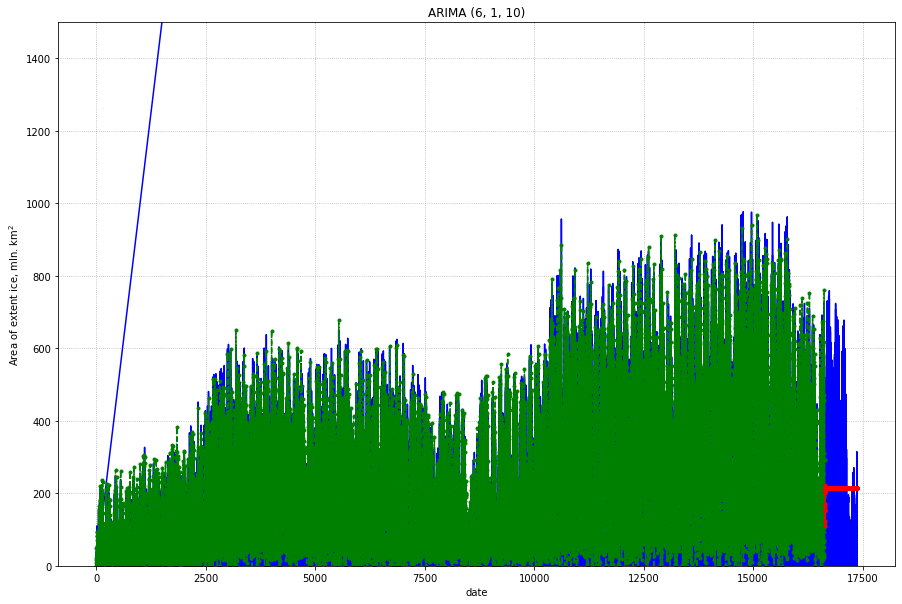

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(df.index, df, '-b')
plt.plot(arima_model.fittedvalues, '--og', markersize=3, 
         label="train fitted values")
plt.plot(y_test.index, prediction_arima_test, '-or', markersize=3, 
         label=f"prediction, MAE = {mae_arima:0.3f}")
plt.grid(linestyle=':')
plt.xlabel("date")
plt.ylabel("Area of extent ice, mln. km$^2$")
plt.title(f"ARIMA {(p, d, q)}")
plt.ylim([0, 1500])
plt.show(True)

Unfortunately, I had about 5 hours to work on this homework + get a general understanding about this topic, which was quiet little for me. From the sample homework I'll try to understand what's going on.